# Imports

In [1]:
from collections import Counter

from tqdm import tqdm

from pfc_packages.gpf_slr import refine_ground_plane
from pfc_packages.gpf_slr import scan_line_run_clustering
from pfc_packages.utils import SemanticKittiDataset
from pfc_packages.utils import get_statistics
from pfc_packages.utils import save_clusters
from pfc_packages.utils import run_viz
from pfc_packages.utils import plot_1, plot_2, plot_3, plot_4, plot_5

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Hyperparameters

In [2]:
# --- Hyperparameters for Ground Plane Fitting (GPF) ---
NUM_LOWEST_POINTS = 10000  # Number of lowest elevation points used to estimate initial ground seed (LPR)
NUM_ITERATIONS = 5  # Number of iterations for plane refinement in GPF
SEED_HEIGHT_THRESHOLD = 0.4  # Max height above LPR to consider a point as a ground seed
PLANE_DISTANCE_THRESHOLD = 0.2  # Max distance from plane to classify a point as ground

# --- Parameters for Scan Line Run (SLR) clustering ---
SLR_RUN_DISTANCE_THRESHOLD = (
    0.2  # Max distance between consecutive points in a scanline to form a run
)
SLR_MERGE_THRESHOLD = 1.0  # Max distance between runs in adjacent scanlines to be considered the same cluster

SAVE_CLUSTER_PREDICT = True  # Save the cluster predictions
OUTPUT_DIR = "../../datasets/semantic-kitti/data_odometry_clusters/dataset/sequences"
TEST_SEQUENCE = 100

# Run Example

In [3]:
dataset = SemanticKittiDataset("../../datasets/semantic-kitti", sequence_list=[TEST_SEQUENCE])

resumo_por_frame = []
combinacoes_geral = Counter()

for point_cloud in tqdm(dataset, desc="Processando frames"):
    point_cloud, normal_d_tuple = refine_ground_plane(point_cloud, NUM_LOWEST_POINTS, NUM_ITERATIONS, SEED_HEIGHT_THRESHOLD)  # type: ignore
    point_cloud = scan_line_run_clustering(
        point_cloud, SLR_RUN_DISTANCE_THRESHOLD, SLR_MERGE_THRESHOLD
    )

    infos_pc = dataset.get_last_seq_frame()
    if infos_pc is not None:
        seq, frame_idx = infos_pc
        estatisticas_do_frame = get_statistics(frame_idx, point_cloud)
        resumo_por_frame.append(estatisticas_do_frame)
        combinacoes_geral += estatisticas_do_frame["combinacoes"]
        if SAVE_CLUSTER_PREDICT:
            save_clusters(point_cloud, seq, frame_idx, OUTPUT_DIR)

Processando frames:   0%|          | 0/5 [00:00<?, ?it/s]

Processando frames: 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


In [4]:
run_viz(
    point_cloud,
    normal_d_tuple
)
run_viz(
    point_cloud,
    normal_d_tuple,
    show_true_label=True,
)

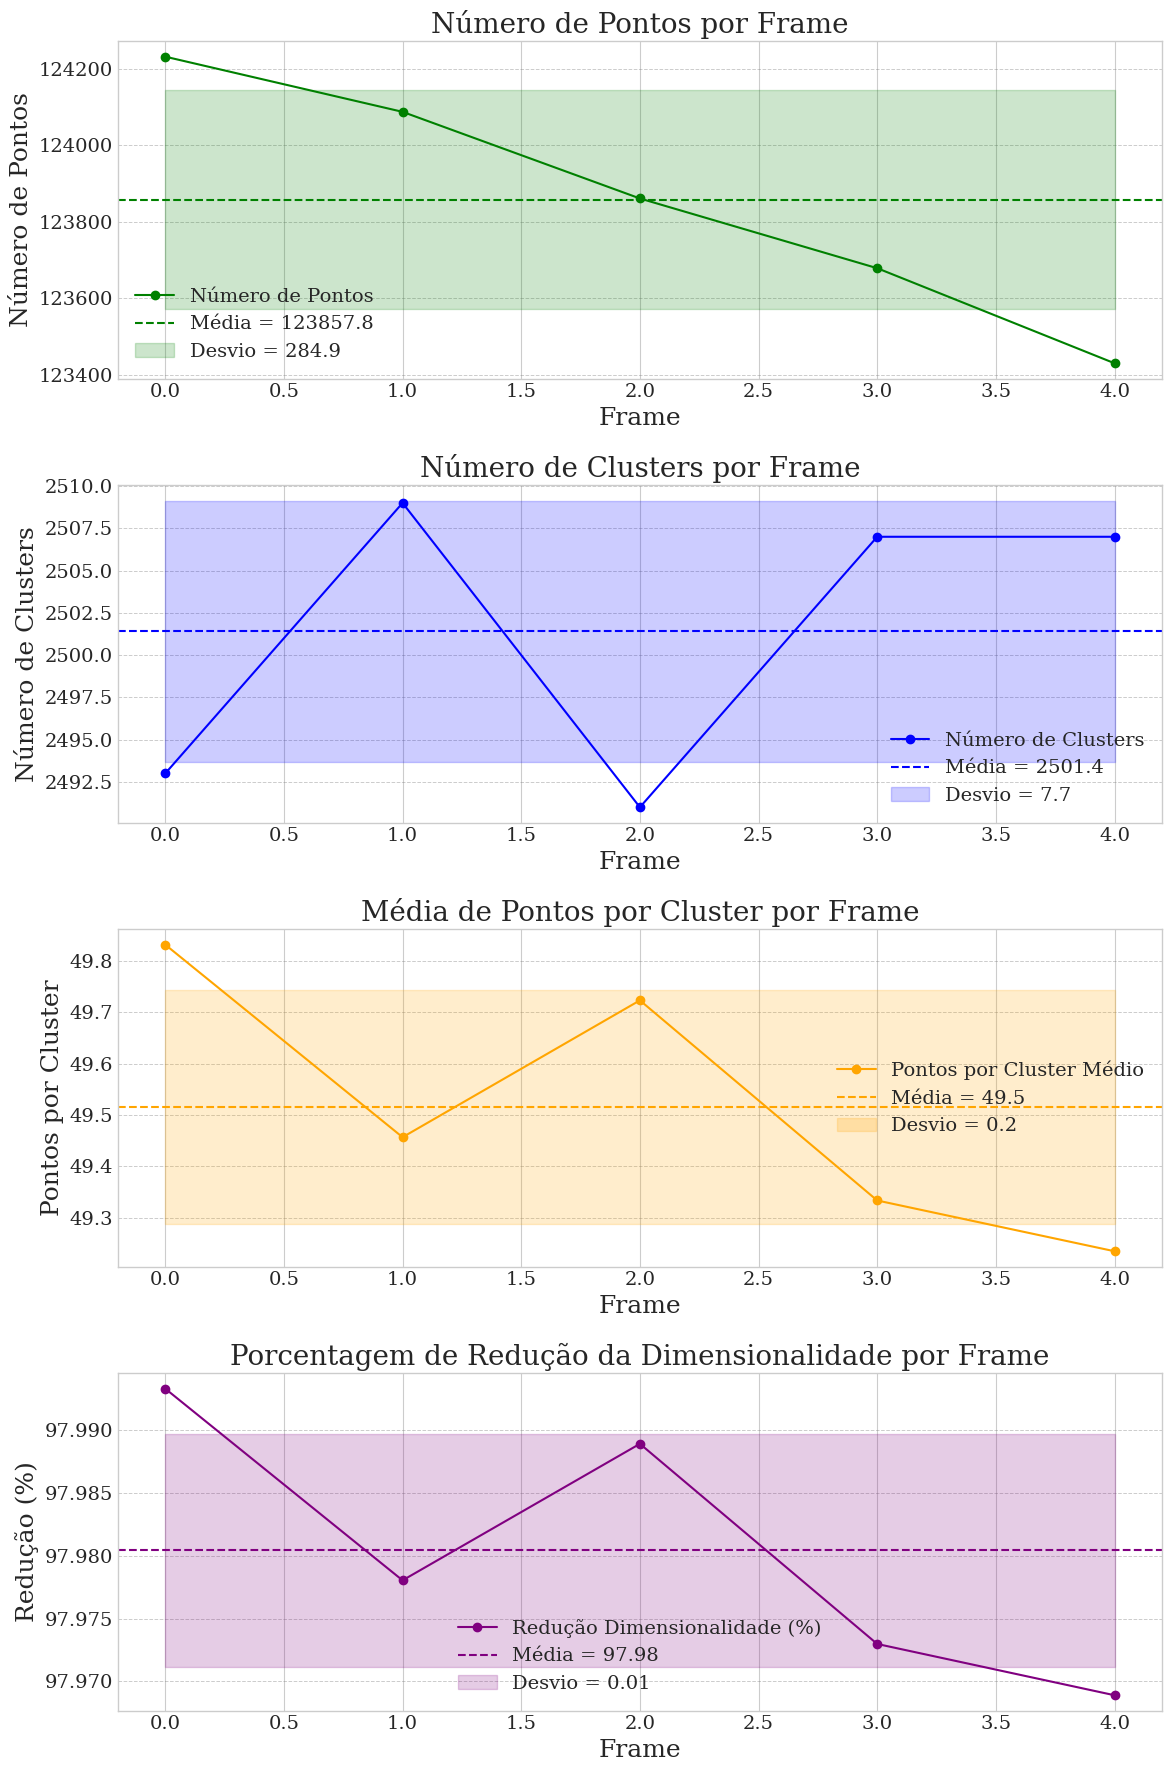

In [5]:
plot_1(resumo_por_frame, seq_value = TEST_SEQUENCE)

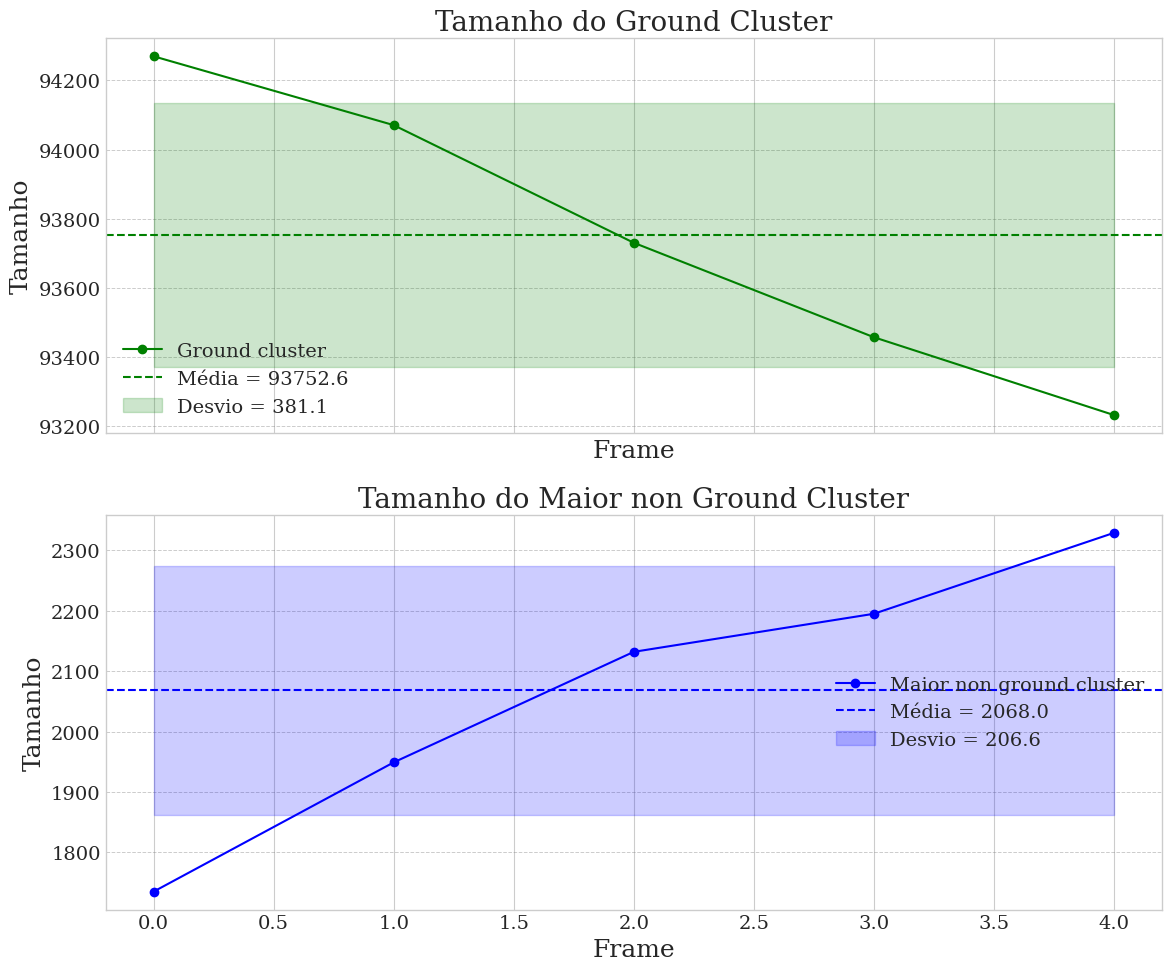

In [6]:
plot_2(resumo_por_frame, seq_value = TEST_SEQUENCE)

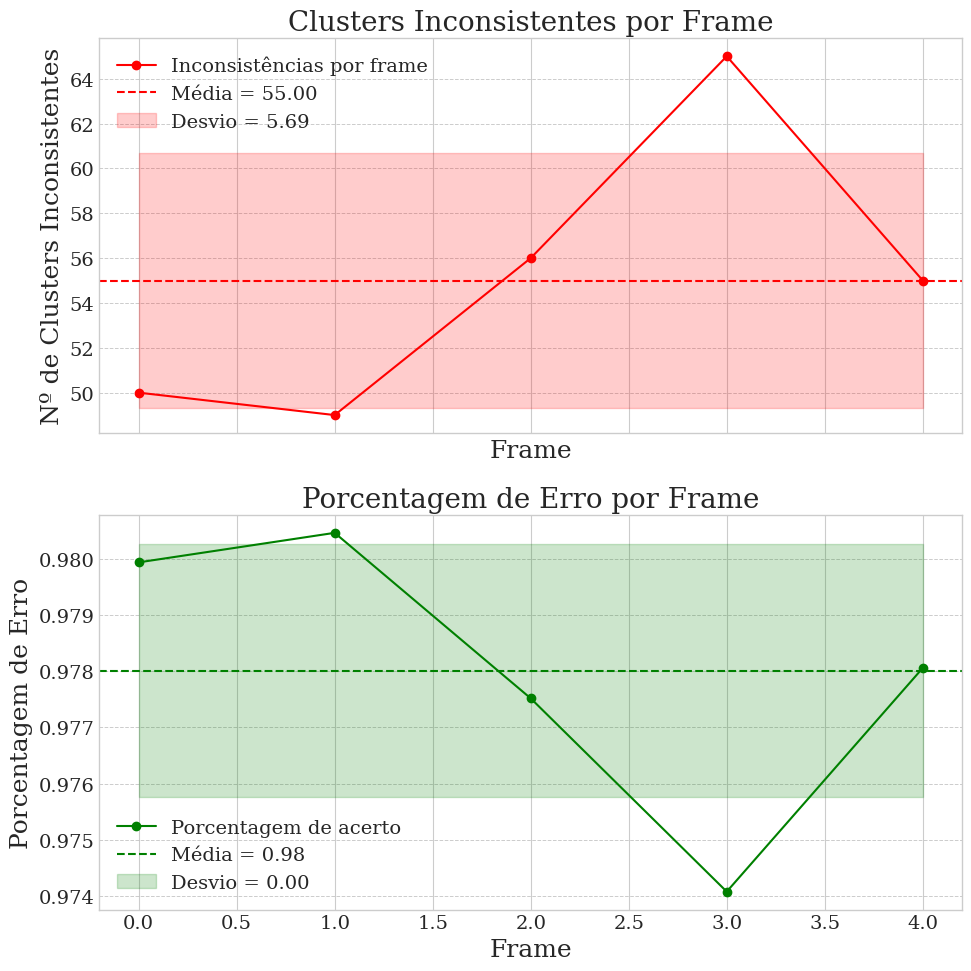

In [7]:
plot_3(resumo_por_frame, seq_value = TEST_SEQUENCE)

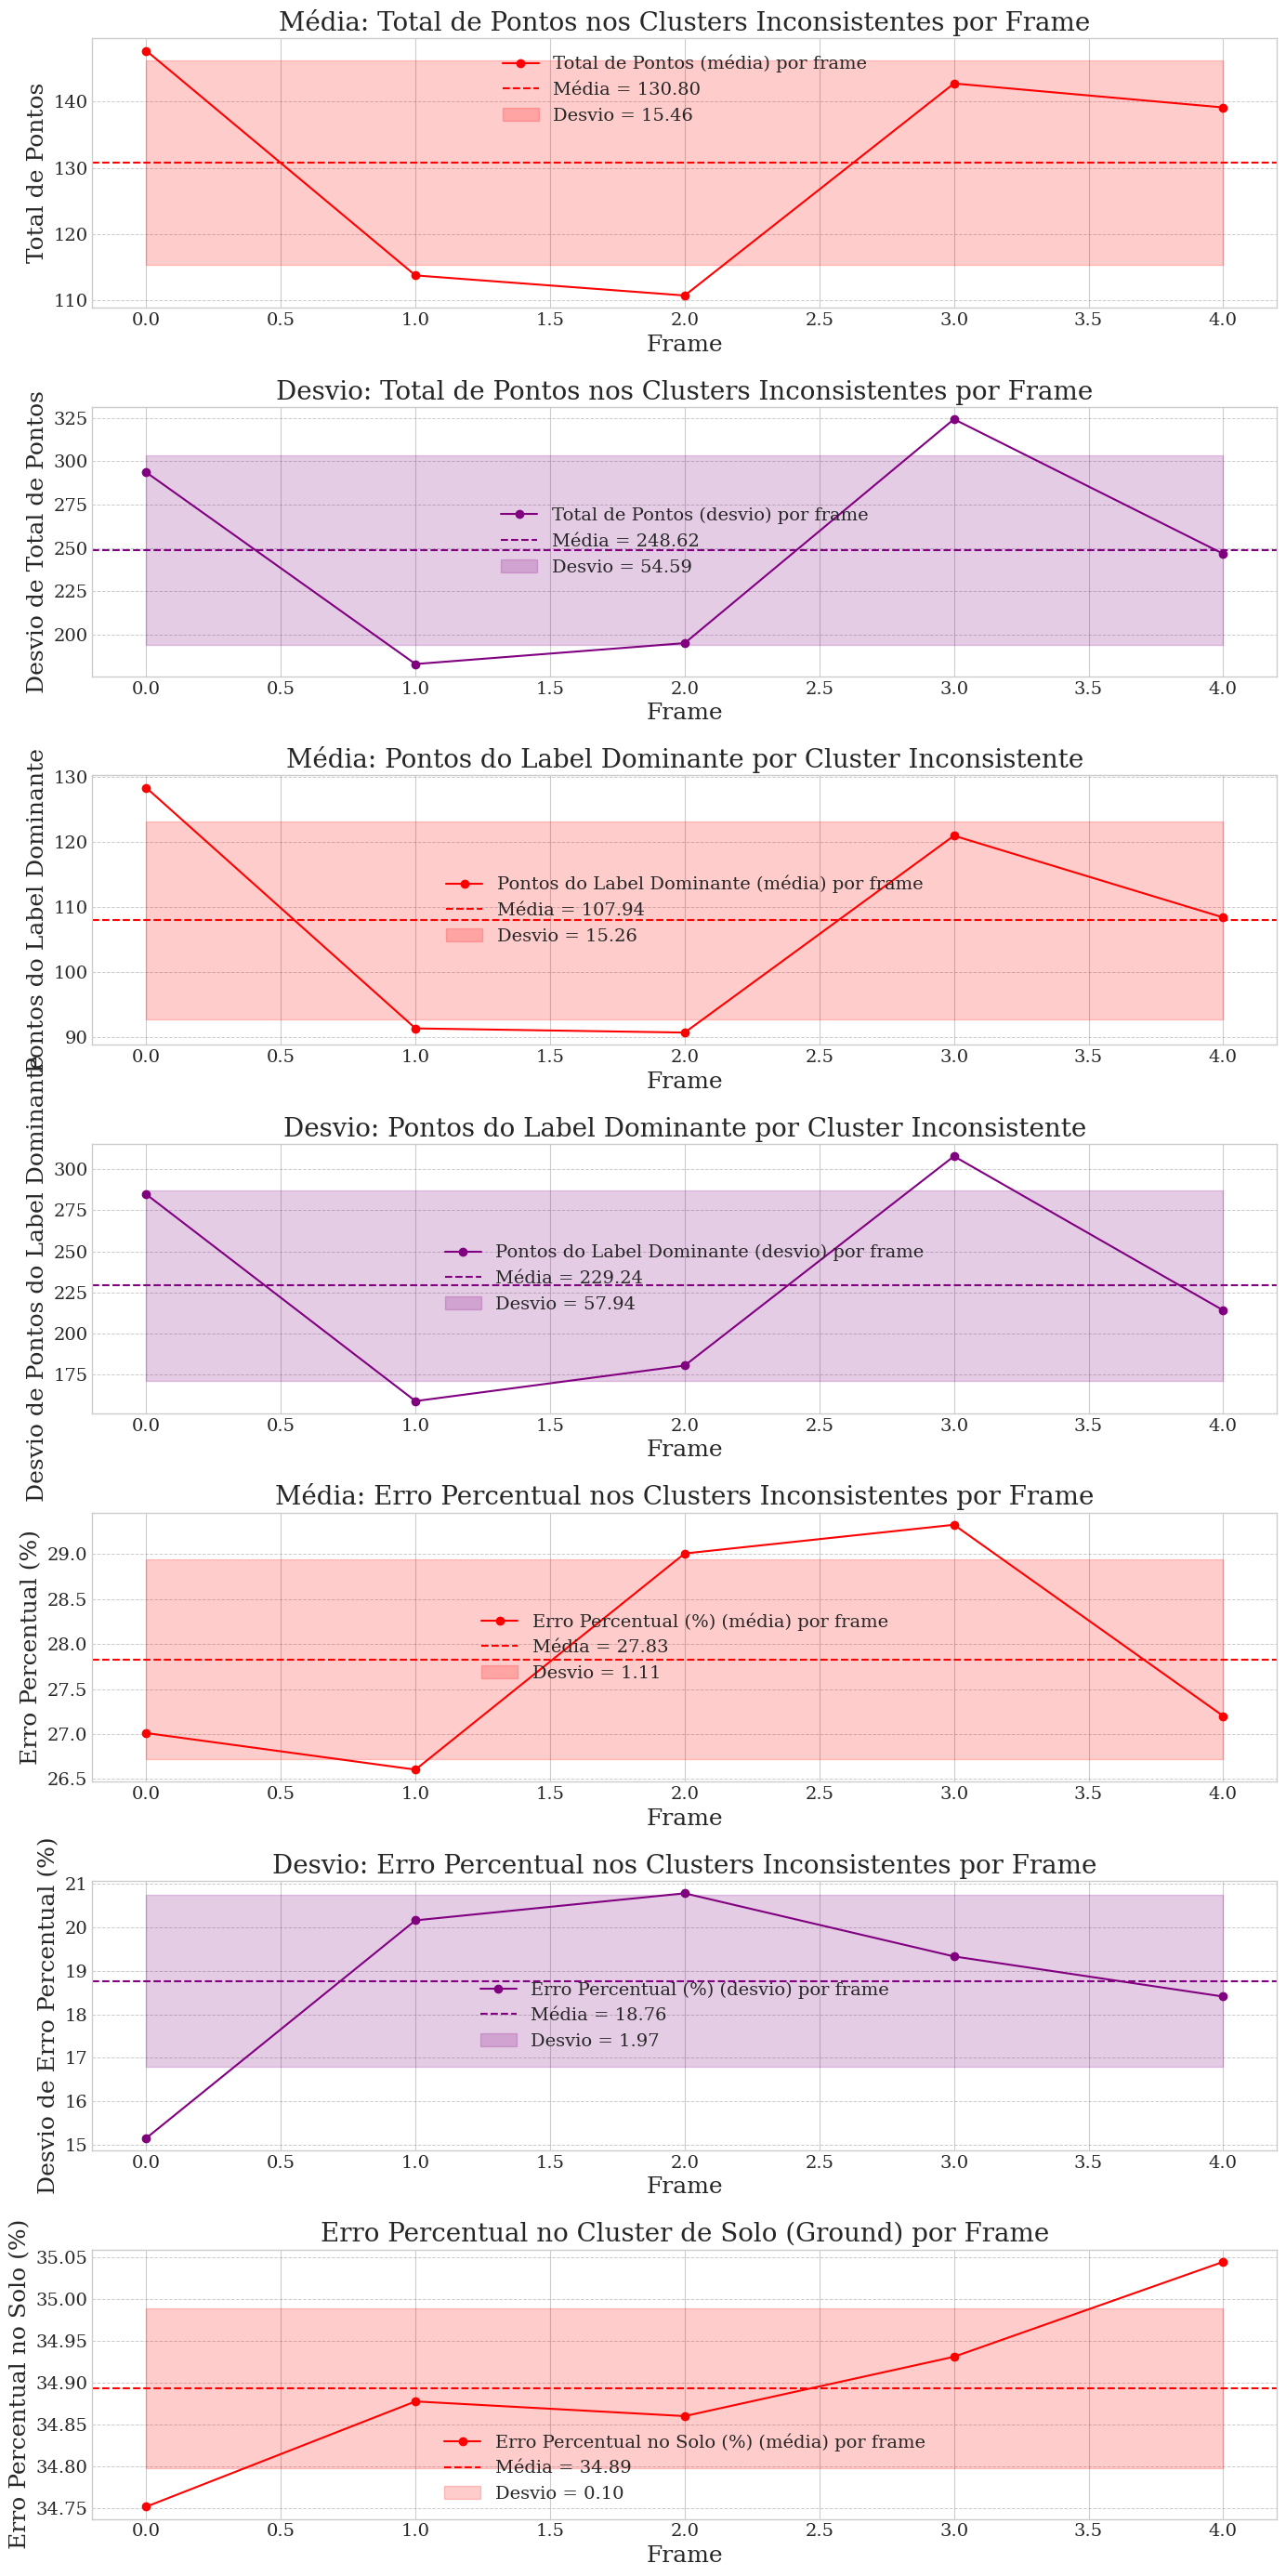

In [8]:
plot_4(resumo_por_frame, seq_value = TEST_SEQUENCE)

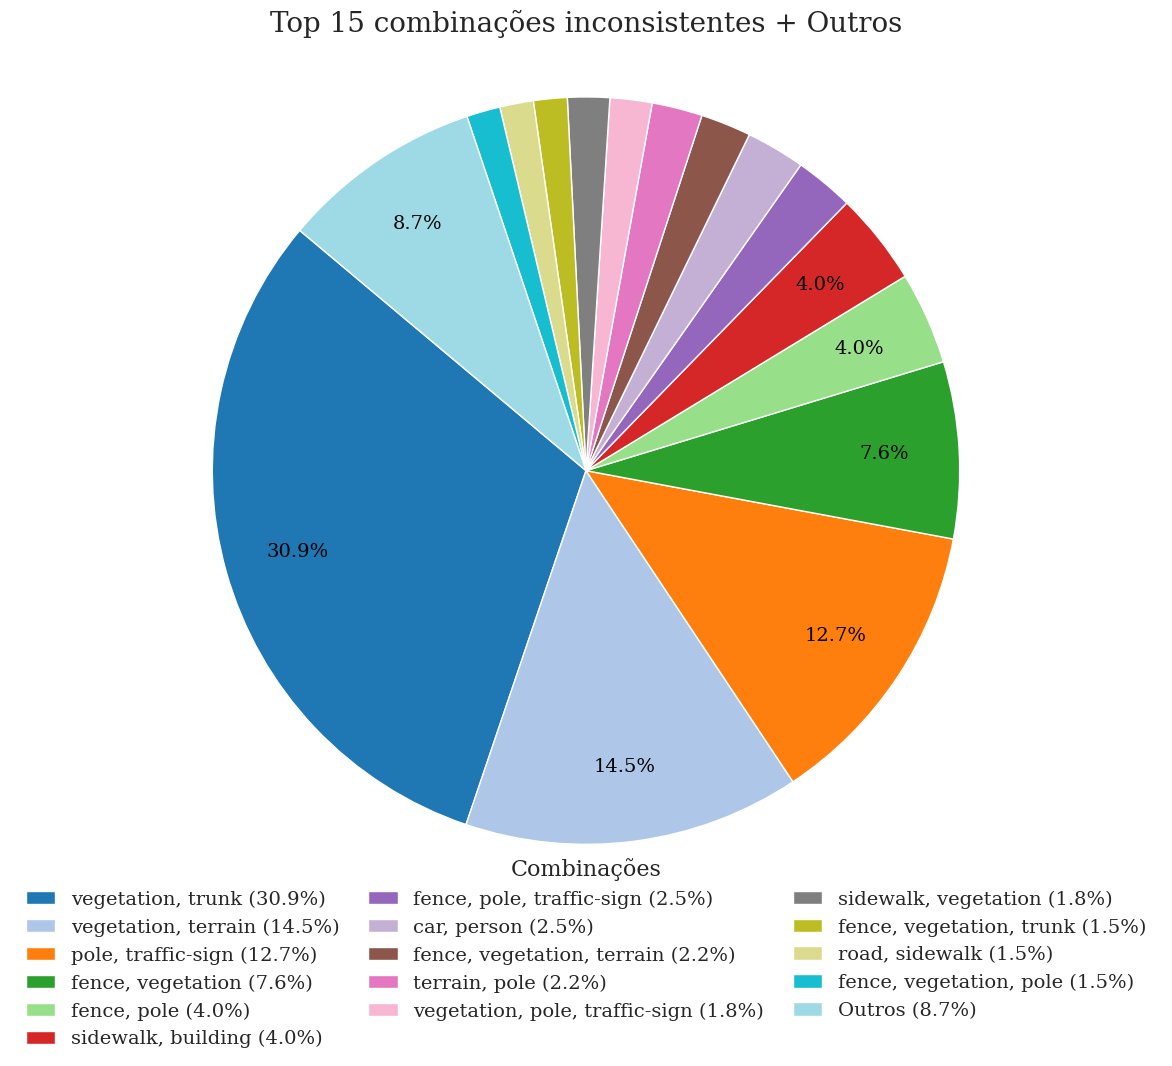

In [9]:
plot_5(combinacoes_geral, seq_value = TEST_SEQUENCE)